# ***Data Exploration of MTS-Dialogue Training Data***

In [1]:
import torch
import pandas as pd
import transformers
import platform
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/envs/clinical-summarization/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(f"Python Verison: {platform.python_version()}")
print(f"PyTorch Version: {torch.__version__}")
print(f"Transformers Version: {transformers.__version__}")

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using device: MPS (Apple Metal)")
else:
    device = torch.device("cpu")
    print("Using device: CPU")

Python Verison: 3.10.18
PyTorch Version: 2.5.1
Transformers Version: 4.55.0
Using device: MPS (Apple Metal)


In [46]:

pd.set_option('display.max_columns',None) #display all the columns 
train_file_path = '../data/MTS-Dialog-TrainingSet.csv'

#loding the training file..
try:
    df_train = pd.read_csv(train_file_path)
    print(f"Dataset is loaded successfully. shape :- {df_train.shape}")
    print("first 5 rows of the training dataset :- ")
    display(df_train.head())
except Exception as e :
    print(f"file is not found at {train_file_path}")
    raise e
    

Dataset is loaded successfully. shape :- (1201, 4)
first 5 rows of the training dataset :- 


,ID,section_header,section_text,dialogue
0,0,GENHX,The patient is a 76-year-old white female who ...,Doctor: What brings you back into the clinic t...
1,1,GENHX,The patient is a 25-year-old right-handed Cauc...,Doctor: How're you feeling today? \r\nPatient...
2,2,GENHX,"This is a 22-year-old female, who presented to...","Doctor: Hello, miss. What is the reason for yo..."
3,3,MEDICATIONS,Prescribed medications were Salmeterol inhaler...,Doctor: Are you taking any over the counter me...
4,4,CC,"Burn, right arm.","Doctor: Hi, how are you? \r\nPatient: I burned..."


In [47]:
print(df_train['section_header'][0])

GENHX


In [48]:
print(df_train['dialogue'][0])

Doctor: What brings you back into the clinic today, miss? 
Patient: I came in for a refill of my blood pressure medicine. 
Doctor: It looks like Doctor Kumar followed up with you last time regarding your hypertension, osteoarthritis, osteoporosis, hypothyroidism, allergic rhinitis and kidney stones.  Have you noticed any changes or do you have any concerns regarding these issues?  
Patient: No. 
Doctor: Have you had any fever or chills, cough, congestion, nausea, vomiting, chest pain, chest pressure?
Patient: No.  
Doctor: Great. Also, for our records, how old are you and what race do you identify yourself as?
Patient: I am seventy six years old and identify as a white female.


In [24]:
print(df_train['section_text'][3])

Prescribed medications were Salmeterol inhaler, prn; and Fluticasone nasal inhaler. The patient was taking no over the counter or alternative medicines.


In [29]:
#basic information
print("Dataset Information:- ")
df_train.info()

Dataset Information:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1201 non-null   int64 
 1   section_header  1201 non-null   object
 2   section_text    1201 non-null   object
 3   dialogue        1201 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.7+ KB


In [30]:
print(len((df_train['ID'].unique())))

1201


In [27]:
print(len((df_train['section_header'].unique())))
df_train['section_header'].unique()


20


array(['GENHX', 'MEDICATIONS', 'CC', 'PASTMEDICALHX', 'ALLERGY',
       'FAM/SOCHX', 'PASTSURGICAL', 'OTHER_HISTORY', 'ASSESSMENT', 'ROS',
       'DISPOSITION', 'EXAM', 'PLAN', 'DIAGNOSIS', 'EDCOURSE',
       'IMMUNIZATIONS', 'LABS', 'IMAGING', 'PROCEDURES', 'GYNHX'],
      dtype=object)


word count stats.. 


,dialogue_word_count,section_text_word_count
count,1201.000000,1201.000000
mean,105.691091,40.575354
std,117.638388,66.951583
min,6.000000,1.000000
25%,34.000000,5.000000
50%,64.000000,14.000000
75%,133.000000,45.000000
max,1509.000000,1020.000000



visualizing data distributions....


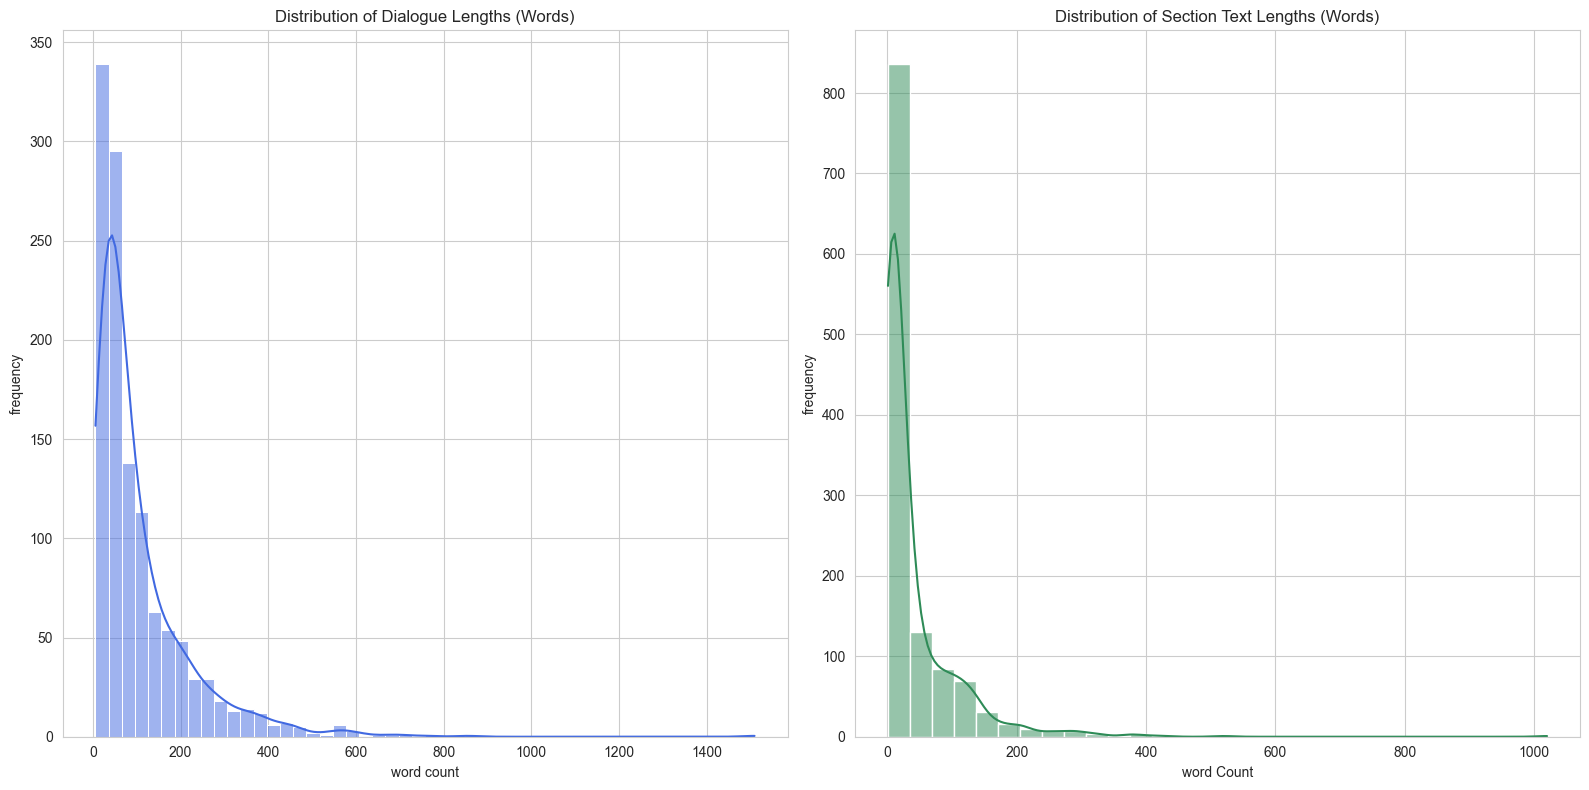

In [43]:
#calculating the words counts on the original columns to understand the raw data 
df_train['dialogue_word_count'] = df_train['dialogue'].str.split().str.len()
df_train['section_text_word_count'] = df_train['section_text'].str.split().str.len()

print("\nword count stats.. ")
display(df_train[['dialogue_word_count', 'section_text_word_count']].describe())

#visualizing the distributions.
print("\nvisualizing data distributions....")
sns.set_style('whitegrid')

plt.figure(figsize=(16, 8))

#plot for dialogue lengths..
plt.subplot(1, 2, 1)
sns.histplot(df_train['dialogue_word_count'], bins=50, color='royalblue', kde=True)
plt.title('Distribution of Dialogue Lengths (Words)')
plt.xlabel('word count')
plt.ylabel('frequency')

#plot for Section Text Lengths
plt.subplot(1, 2, 2)
sns.histplot(df_train['section_text_word_count'], bins=30, color='seagreen', kde=True)
plt.title('Distribution of Section Text Lengths (Words)')
plt.xlabel('word Count')
plt.ylabel('frequency')



plt.tight_layout()
plt.show()